<a href="https://colab.research.google.com/github/Shaadalam9/Shaadalam9/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train (16).csv


In [3]:
import io 
df = pd.read_csv(io.BytesIO(data_to_load['train.csv']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

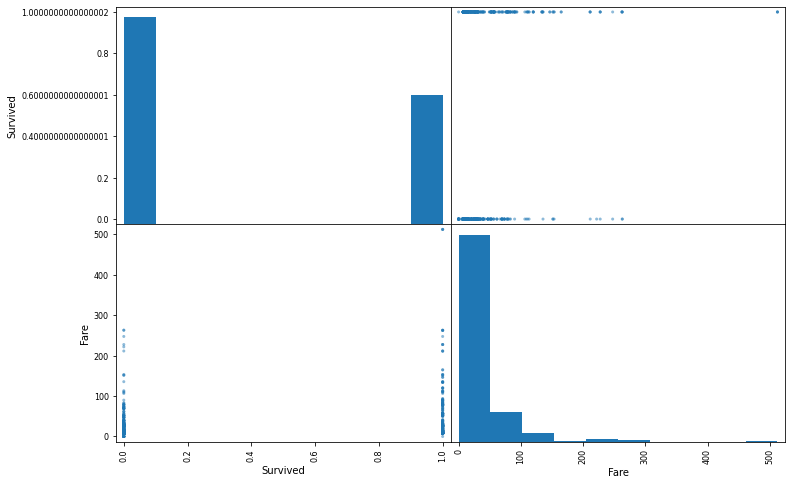

In [6]:
imp_attributes=["Survived","Fare"]
from pandas.plotting import scatter_matrix
scatter_matrix(df[imp_attributes],figsize=(12,8))
plt.show()

In [7]:
df=df.drop("Name",axis=1)

In [8]:
df=df.drop("Ticket",axis=1)
df=df.drop("Cabin",axis=1)
df=df.drop("PassengerId",axis=1)

In [9]:
df_sex=df["Sex"]
df_sex_encoded,df_sex_categories=df_sex.factorize()

In [10]:
df_sex_encoded,df_sex_categories

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()
df_sex_1hot=encoder.fit_transform(df_sex_encoded.reshape(-1,1))

In [12]:
df_sex_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [13]:
df_sex_encoded=pd.DataFrame(df_sex_encoded)

In [14]:
df=pd.concat([df,df_sex_encoded],axis=1)

In [15]:
df=df.drop("Sex",axis=1)

In [16]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,0
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0
887,1,1,19.0,0,0,30.0000,S,1
888,0,3,NaN,1,2,23.4500,S,1
889,1,1,26.0,0,0,30.0000,C,0


In [17]:
df_embarked=df["Embarked"]
df_embarked_encoded,df_embarked_categories=df_embarked.factorize()

In [18]:
df_embarked_encoded,df_embarked_categories

(array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
         1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
         0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
         0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
         0, 

In [19]:
df_embarked_encoded=pd.DataFrame(df_embarked_encoded)

In [20]:
df=pd.concat([df,df_embarked_encoded],axis=1)

In [21]:
df=df.drop("Embarked",axis=1)

In [22]:
X = df.iloc[:,3].values
X=X.reshape(-1, 1)
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [23]:
X=pd.DataFrame(X)

In [24]:
df=pd.concat([df,X],axis=1)

In [25]:
df=df.drop("Age",axis=1)

In [26]:
df.columns=["Survived","Pclass","SibSp","Parch","Fare","Sex","Embarked","Age"]

In [27]:
df

,Survived,Pclass,SibSp,Parch,Fare,Sex,Embarked,Age
0,0,3,1,0,7.2500,0,0,1.0
1,1,1,1,0,71.2833,1,1,1.0
2,1,3,0,0,7.9250,1,0,0.0
3,1,1,1,0,53.1000,1,0,1.0
4,0,3,0,0,8.0500,0,0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0,0,0.0
887,1,1,0,0,30.0000,1,0,0.0
888,0,3,1,2,23.4500,1,0,1.0
889,1,1,0,0,30.0000,0,1,0.0


In [28]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
object = StandardScaler()
x=object.fit_transform(x)

In [31]:
x

array([[ 0.82737724,  0.43279337, -0.47367361, ..., -0.73769513,
        -0.56261872,  0.43279337],
       [-1.56610693,  0.43279337, -0.47367361, ...,  1.35557354,
         1.00392278,  0.43279337],
       [ 0.82737724, -0.4745452 , -0.47367361, ...,  1.35557354,
        -0.56261872, -0.4745452 ],
       ...,
       [ 0.82737724,  0.43279337,  2.00893337, ...,  1.35557354,
        -0.56261872,  0.43279337],
       [-1.56610693, -0.4745452 , -0.47367361, ..., -0.73769513,
         1.00392278, -0.4745452 ],
       [ 0.82737724, -0.4745452 , -0.47367361, ..., -0.73769513,
         2.57046428, -0.4745452 ]])

In [32]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
some_data=x[:5]
object = StandardScaler()
some_data=object.fit_transform(some_data)


In [34]:
sgd_clf.predict(x)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x,y,cv=3,scoring="accuracy")

array([0.77441077, 0.7003367 , 0.77104377])

In [36]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(sgd_clf,x,y,cv=3)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[427, 122],
       [102, 240]])

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y,y_pred), recall_score(y,y_pred), f1_score(y,y_pred)

(0.6629834254143646, 0.7017543859649122, 0.6818181818181818)

In [39]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(sgd_clf,x,y,cv=3,method="decision_function")

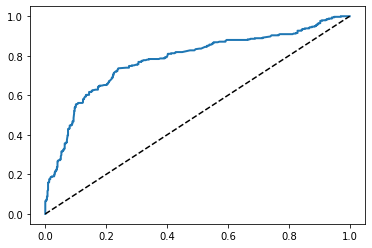

In [40]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y,y_scores)
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  [...]
plot_roc_curve(fpr,tpr)
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier()
y_pred_forest=cross_val_predict(forest_clf,x,y,cv=3,method="predict_proba")

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf,x,y,cv=3,scoring="accuracy")

array([0.74747475, 0.8047138 , 0.80808081])

In [43]:
from sklearn.model_selection import cross_val_predict
y_scores_forest=cross_val_predict(sgd_clf,x,y,cv=3,method="decision_function")

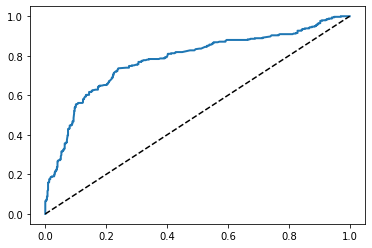

In [44]:
from sklearn.metrics import roc_curve
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y,y_scores_forest)
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  [...]
plot_roc_curve(fpr,tpr)
plt.show()

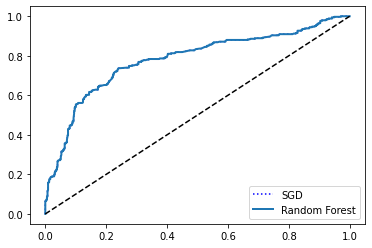

In [47]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()